New Notebook Created by Jupyter MCP Server

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('../uploaded/inflation interest unemployment.csv')

# Display basic information
print("Dataset Head:")
print(df.head())
print("\nDataset Shape:")
print(df.shape)
print("\nDataset Info:")
df.info()
print("\nDataset Description:")
print(df.describe())


Dataset Head:
       country  year  Inflation, consumer prices (annual %)  \
0  Afghanistan  1970                                    NaN   
1  Afghanistan  1971                                    NaN   
2  Afghanistan  1972                                    NaN   
3  Afghanistan  1973                                    NaN   
4  Afghanistan  1974                                    NaN   

   Inflation, GDP deflator (annual %)  Real interest rate (%)  \
0                                 NaN                     NaN   
1                                 NaN                     NaN   
2                                 NaN                     NaN   
3                                 NaN                     NaN   
4                                 NaN                     NaN   

   Deposit interest rate (%)  Lending interest rate (%)  \
0                        NaN                        NaN   
1                        NaN                        NaN   
2                        NaN           

In [2]:

# Select and rename relevant columns
df_cleaned = df[[
    'country',
    'year',
    'Inflation, consumer prices (annual %)',
    'Real interest rate (%)',
    'Unemployment, total (% of total labor force) (modeled ILO estimate)'
]].copy()

df_cleaned.rename(columns={
    'Inflation, consumer prices (annual %)': 'Inflation',
    'Real interest rate (%)': 'Interest_Rate',
    'Unemployment, total (% of total labor force) (modeled ILO estimate)': 'Unemployment'
}, inplace=True)

print("Columns after renaming:")
print(df_cleaned.columns)

# Check for missing values
print("\nMissing values before dropping:")
print(df_cleaned.isnull().sum())

# Drop rows with any missing values in the key columns
df_cleaned.dropna(subset=['Inflation', 'Interest_Rate', 'Unemployment'], inplace=True)

print("\nMissing values after dropping:")
print(df_cleaned.isnull().sum())
print("\nShape after dropping missing values:")
print(df_cleaned.shape)

# Check for duplicates based on country and year
duplicates = df_cleaned.duplicated(subset=['country', 'year']).sum()
print(f"\nNumber of duplicate rows (country, year): {duplicates}")

# Display head of cleaned data
print("\nCleaned Data Head:")
print(df_cleaned.head())


Columns after renaming:
Index(['country', 'year', 'Inflation', 'Interest_Rate', 'Unemployment'], dtype='object')

Missing values before dropping:
country             0
year                0
Inflation        4250
Interest_Rate    9661
Unemployment     6547
dtype: int64

Missing values after dropping:
country          0
year             0
Inflation        0
Interest_Rate    0
Unemployment     0
dtype: int64

Shape after dropping missing values:
(3070, 5)

Number of duplicate rows (country, year): 0

Cleaned Data Head:
        country  year  Inflation  Interest_Rate  Unemployment
36  Afghanistan  2006   6.784597      10.046897        11.099
37  Afghanistan  2007   8.680571      -3.585111        11.301
38  Afghanistan  2008  26.418664      12.557960        11.093
39  Afghanistan  2009  -6.811161      17.542929        11.311
40  Afghanistan  2010   2.178538      11.364094        11.352


In [3]:

# Descriptive statistics for key variables
print("Descriptive Statistics for Inflation, Interest Rate, and Unemployment:")
print(df_cleaned[['Inflation', 'Interest_Rate', 'Unemployment']].describe())


Descriptive Statistics for Inflation, Interest Rate, and Unemployment:
         Inflation  Interest_Rate  Unemployment
count  3070.000000    3070.000000   3070.000000
mean     14.883937       6.244520      7.950225
std     136.311828      12.391344      6.454749
min     -18.108630     -93.513459      0.100000
25%       2.144179       2.217345      3.500000
50%       4.594714       5.778132      5.925000
75%       8.753798      10.179230     10.412500
max    4734.914347     139.963569     37.594002


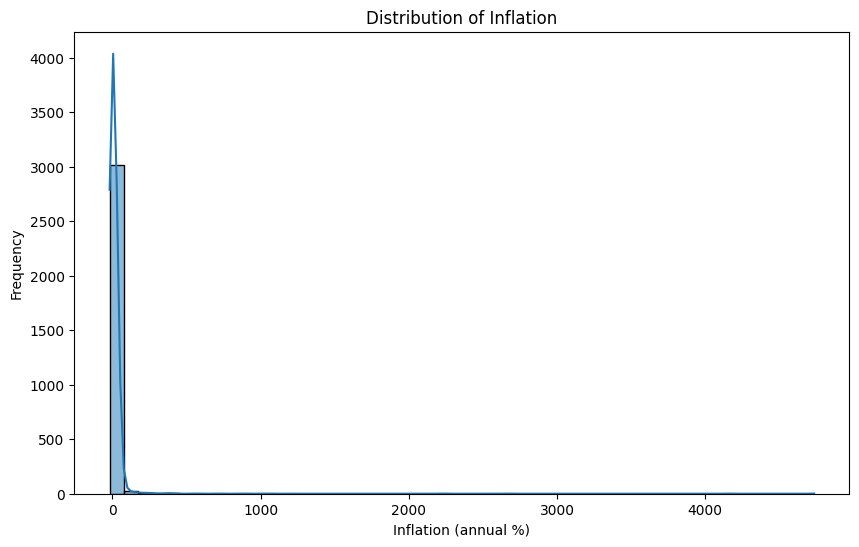

In [4]:

plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['Inflation'], kde=True, bins=50)
plt.title('Distribution of Inflation')
plt.xlabel('Inflation (annual %)')
plt.ylabel('Frequency')
plt.show()


### Plot 1: Distribution of Inflation

This histogram displays the frequency distribution of annual inflation rates. The x-axis represents the inflation rate in annual percentage, and the y-axis shows the frequency of observations. The distribution is highly right-skewed, with the vast majority of inflation rates clustered between -20% and 100%. There is a very long tail extending to extremely high positive values (up to around 4700%), indicating the presence of severe hyperinflationary events which are significant outliers.

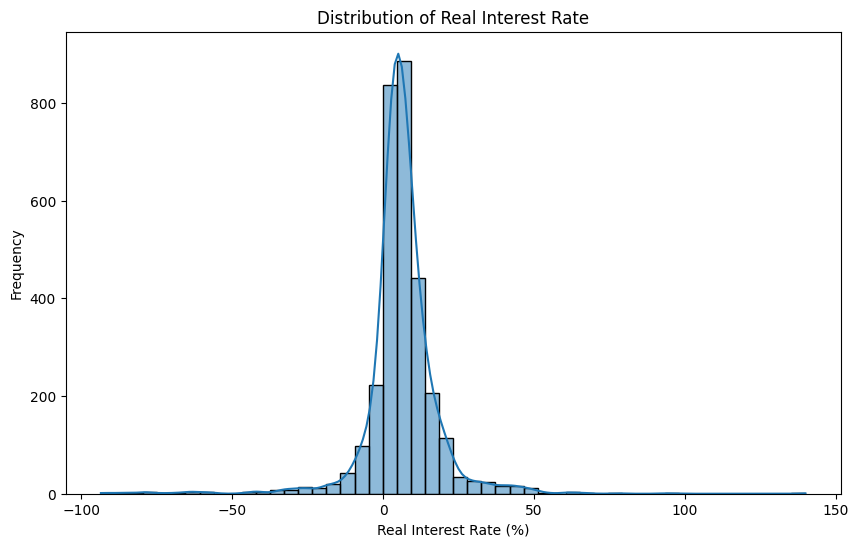

In [5]:

plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['Interest_Rate'], kde=True, bins=50)
plt.title('Distribution of Real Interest Rate')
plt.xlabel('Real Interest Rate (%)')
plt.ylabel('Frequency')
plt.show()


### Plot 2: Distribution of Real Interest Rate

This histogram illustrates the frequency distribution of real interest rates. The x-axis represents the real interest rate in percentage, and the y-axis indicates the frequency of observations. The distribution is somewhat right-skewed, with the majority of rates falling between -20% and 20%. There are noticeable tails on both sides, indicating some very high positive interest rates and some significantly negative ones, which could be considered outliers.

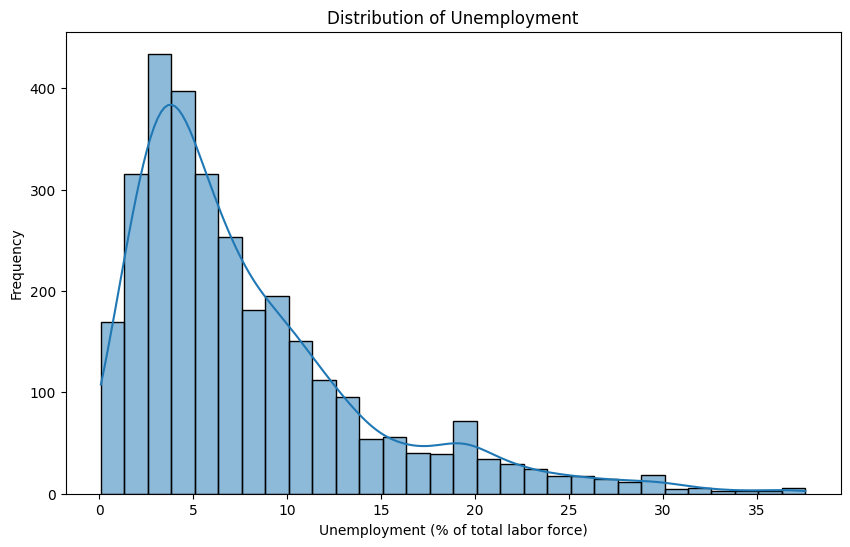

In [6]:

plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['Unemployment'], kde=True, bins=30)
plt.title('Distribution of Unemployment')
plt.xlabel('Unemployment (% of total labor force)')
plt.ylabel('Frequency')
plt.show()


### Plot 3: Distribution of Unemployment

This histogram illustrates the frequency distribution of unemployment rates. The x-axis represents the unemployment rate as a percentage of the total labor force, and the y-axis shows the frequency of observations. The distribution is right-skewed, with a high concentration of values between 0% and 10%. There is a tail extending towards higher unemployment rates (up to approximately 38%), indicating instances of high unemployment that could be considered outliers.

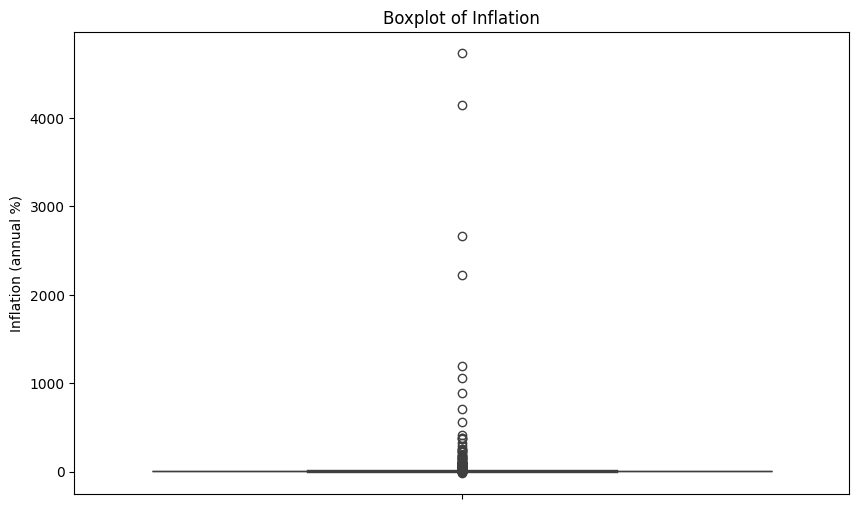

In [7]:

plt.figure(figsize=(10, 6))
sns.boxplot(y=df_cleaned['Inflation'])
plt.title('Boxplot of Inflation')
plt.ylabel('Inflation (annual %)')
plt.show()


### Plot 4: Boxplot of Inflation

This boxplot visualizes the distribution of annual inflation rates. The y-axis represents the inflation rate in annual percentage. The box is extremely compressed near the lower values, indicating that the interquartile range is small and most data points are concentrated there. There is a very long upper whisker and a vast number of individual points plotted far above the whisker, which are significant outliers representing periods of hyperinflation. This confirms the highly skewed nature of the inflation data.

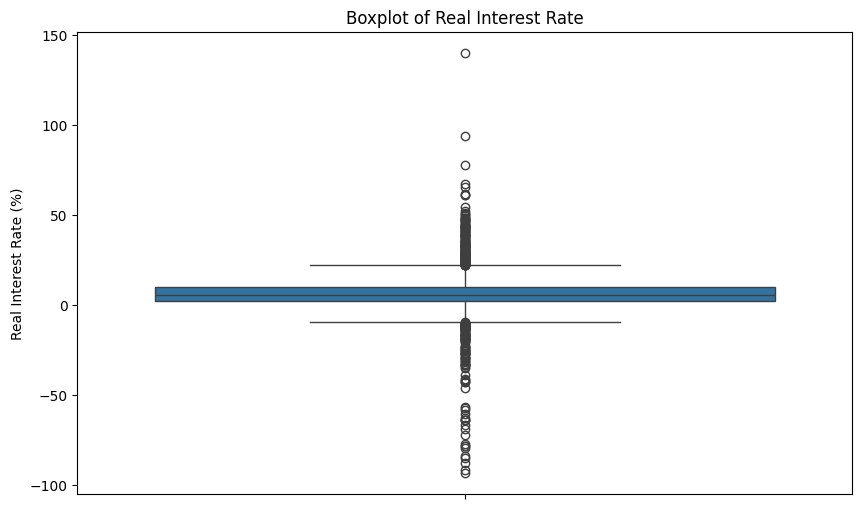

In [8]:

plt.figure(figsize=(10, 6))
sns.boxplot(y=df_cleaned['Interest_Rate'])
plt.title('Boxplot of Real Interest Rate')
plt.ylabel('Real Interest Rate (%)')
plt.show()


### Plot 5: Boxplot of Real Interest Rate

This boxplot displays the distribution of real interest rates. The y-axis represents the real interest rate in percentage. The central box is relatively compact, indicating that the majority of real interest rates fall within a moderate range. However, there are numerous outliers extending significantly above and below the whiskers, suggesting instances of unusually high or low (even negative) real interest rates.

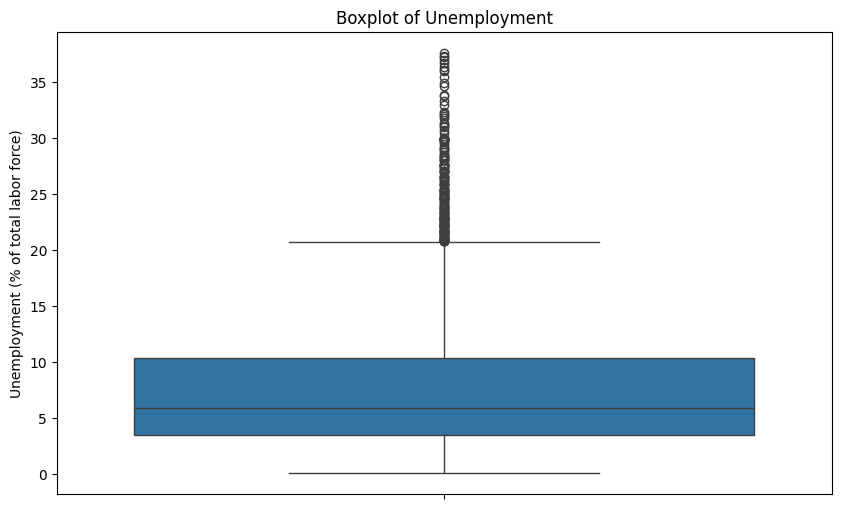

In [9]:

plt.figure(figsize=(10, 6))
sns.boxplot(y=df_cleaned['Unemployment'])
plt.title('Boxplot of Unemployment')
plt.ylabel('Unemployment (% of total labor force)')
plt.show()


### Plot 6: Boxplot of Unemployment

This boxplot illustrates the distribution of unemployment rates. The y-axis represents the unemployment rate as a percentage of the total labor force. The box shows that the majority of unemployment rates fall within a relatively narrow range, primarily below 10%. However, there are numerous individual data points plotted above the upper whisker, indicating the presence of significant outliers representing periods or regions with unusually high unemployment rates.

Correlation Matrix:
               Inflation  Interest_Rate  Unemployment
Inflation       1.000000      -0.378624     -0.007061
Interest_Rate  -0.378624       1.000000     -0.016389
Unemployment   -0.007061      -0.016389      1.000000


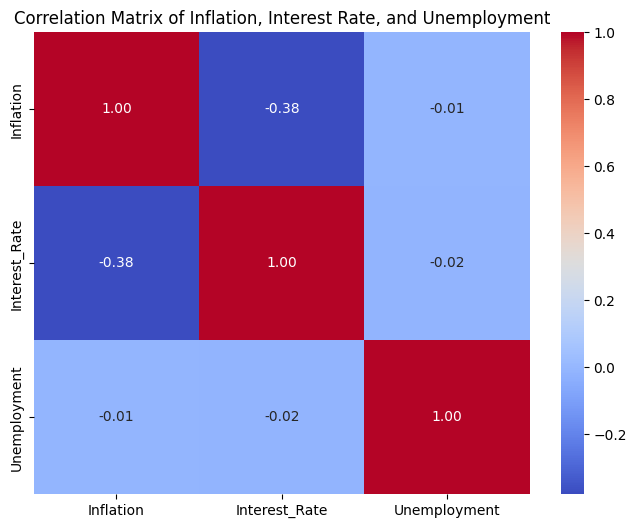

In [10]:

# Calculate the correlation matrix
correlation_matrix = df_cleaned[['Inflation', 'Interest_Rate', 'Unemployment']].corr()

print("Correlation Matrix:")
print(correlation_matrix)

# Visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Inflation, Interest Rate, and Unemployment')
plt.show()


### Plot 7: Correlation Matrix of Inflation, Interest Rate, and Unemployment

This heatmap displays the Pearson correlation coefficients between Inflation, Real Interest Rate, and Unemployment. The color intensity and the annotated values indicate the strength and direction of the linear relationships.

*   **Inflation and Interest Rate**: There is a moderate negative correlation (-0.38). This suggests that as inflation increases, the real interest rate tends to decrease. This could be due to nominal interest rates not fully adjusting to inflation, leading to lower real returns during inflationary periods.
*   **Inflation and Unemployment**: The correlation is very weak and slightly negative (-0.01). This indicates almost no linear relationship between these two variables in this dataset, which is contrary to the short-run Phillips curve theory that suggests an inverse relationship.
*   **Interest Rate and Unemployment**: The correlation is also very weak and slightly negative (-0.02), implying a negligible linear relationship between real interest rates and unemployment.

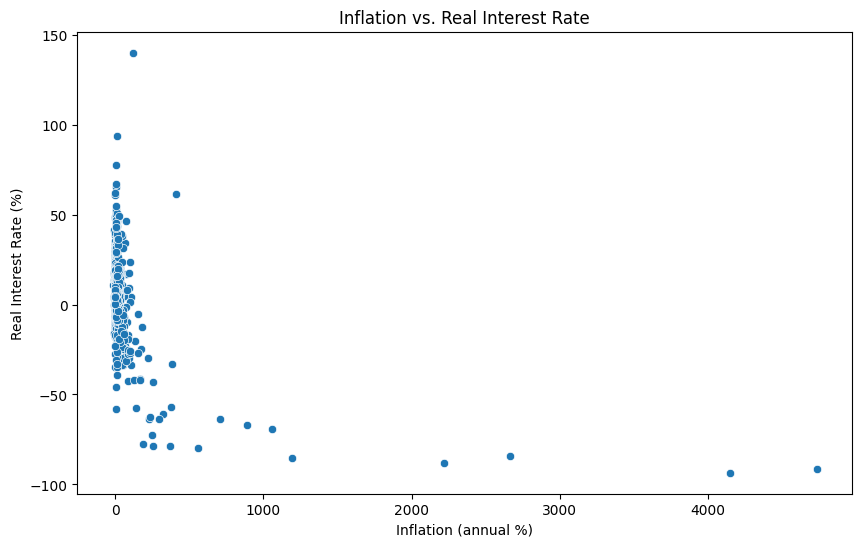

In [11]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Inflation', y='Interest_Rate', data=df_cleaned)
plt.title('Inflation vs. Real Interest Rate')
plt.xlabel('Inflation (annual %)')
plt.ylabel('Real Interest Rate (%)')
plt.show()


### Plot 8: Inflation vs. Real Interest Rate

This scatter plot visualizes the relationship between annual inflation (x-axis) and real interest rate (y-axis). The plot shows a discernible negative trend: as inflation increases, the real interest rate tends to decrease. This relationship is particularly evident at higher inflation values, where real interest rates often become negative. The majority of data points are clustered in the region of low inflation (0-100%) and moderate real interest rates (-20% to 20%). Outliers with extremely high inflation rates are associated with real interest rates that are often close to zero or negative.

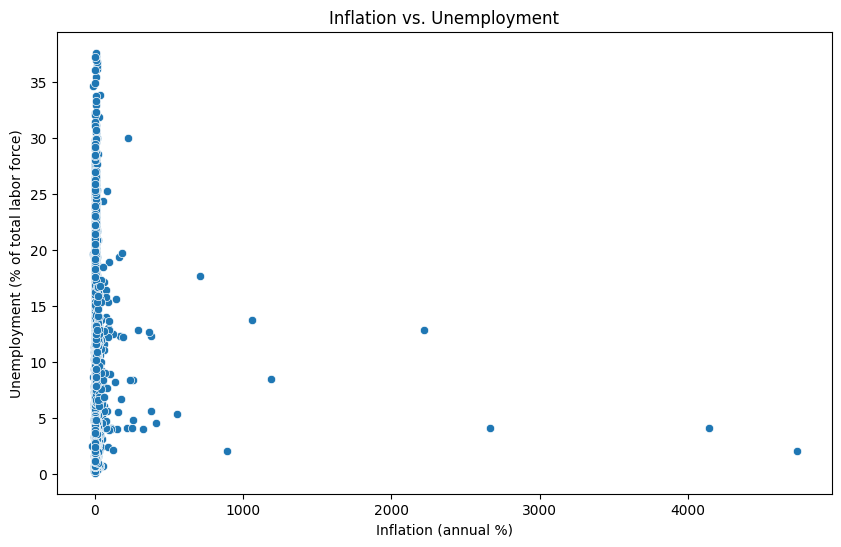

In [12]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Inflation', y='Unemployment', data=df_cleaned)
plt.title('Inflation vs. Unemployment')
plt.xlabel('Inflation (annual %)')
plt.ylabel('Unemployment (% of total labor force)')
plt.show()


### Plot 9: Inflation vs. Unemployment

This scatter plot illustrates the relationship between annual inflation (x-axis) and unemployment rate (y-axis). The plot reveals no clear linear trend or pattern between these two variables. Data points are widely dispersed across the graph. While there is a dense cluster at low inflation and low to moderate unemployment, there are also numerous observations with high inflation rates that correspond to a wide range of unemployment levels, and vice-versa. This visual evidence supports the very weak correlation coefficient found earlier, suggesting that a simple linear relationship, such as the short-run Phillips curve, is not strongly present in this aggregated dataset.

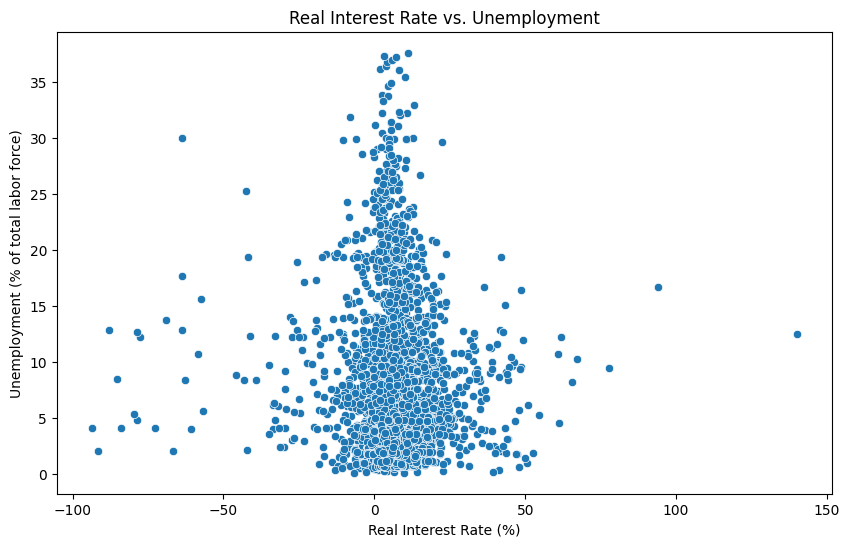

In [13]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Interest_Rate', y='Unemployment', data=df_cleaned)
plt.title('Real Interest Rate vs. Unemployment')
plt.xlabel('Real Interest Rate (%)')
plt.ylabel('Unemployment (% of total labor force)')
plt.show()


### Plot 10: Real Interest Rate vs. Unemployment

This scatter plot displays the relationship between real interest rate (x-axis) and unemployment rate (y-axis). Similar to the inflation-unemployment relationship, this plot shows no clear linear correlation or discernible trend. The data points are widely distributed, indicating that variations in real interest rates do not consistently explain variations in unemployment rates, or vice versa, in a linear fashion. The majority of observations are concentrated around moderate real interest rates and low to moderate unemployment, but outliers in both dimensions do not form any distinct pattern.